In [ ]:
#imports and downloads
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100


reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        #print(para)
        reviews.append(para.get_text())

        #print(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()

df["reviews"] = reviews
df['reviews'] = df['reviews'].str.split('|').str[1]
df.head(6)


,reviews
0,Having experienced delays and cancellations ...
1,Travelled to Heathrow to Kalamata and return ...
2,This flight failed at every level. We were d...
3,Beware of British Airways and their marketin...
4,I flew from Cairo to Heathrow on what they c...
5,"I flew with numerous airlines, but I gotta ad..."


In [ ]:
#lower the data
df['reviews'] = df['reviews'].str.lower()
#Remove additional spaces
df['reviews'] = df['reviews'].str.strip()

df.head(6)

,reviews
0,having experienced delays and cancellations de...
1,travelled to heathrow to kalamata and return j...
2,this flight failed at every level. we were del...
3,beware of british airways and their marketing ...
4,i flew from cairo to heathrow on what they cal...
5,"i flew with numerous airlines, but i gotta adm..."


In [ ]:
#New column in a df with no values
df['Sentiment']=0
print(df)

                                               reviews  Sentiment
0    having experienced delays and cancellations de...          0
1    travelled to heathrow to kalamata and return j...          0
2    this flight failed at every level. we were del...          0
3    beware of british airways and their marketing ...          0
4    i flew from cairo to heathrow on what they cal...          0
..                                                 ...        ...
995  delivering outstanding customer service onboar...          0
996  this was a night flight new york jfk to london...          0
997  amman to london. appalling service both on the...          0
998  paphos to london gatwick in club europe. we ha...          0
999  gatwick to paphos in club europe. we travelled...          0

[1000 rows x 2 columns]


In [ ]:
#Loop through the data frame and identify the sentiment
sia = SentimentIntensityAnalyzer()
def sentiment_analyzer(value):
  sentiment_scores = sia.polarity_scores(value)
  compound_score = sentiment_scores['compound']
  if compound_score >= 0.05:
     sentiment = 1
  elif compound_score <= -0.05:
       sentiment = -1
  else:
       sentiment = 0
  return sentiment

for index, row in df.iterrows():

  df.at[index, 'Sentiment'] = sentiment_analyzer(row[0])

In [ ]:
#df.to_csv("/content/sample_data/data/BA_reviews.csv")

In [ ]:
Postitive_df = pd.DataFrame()
Negative_df = pd.DataFrame()

In [ ]:
for index, row in df.iterrows():
    if row[1] == 1:
      valp=row[0]
      Postitive_df = pd.concat([Postitive_df,pd.Series(valp)], ignore_index=True)
    elif row[1] == -1:
      valn=row[0]
      Negative_df = pd.concat([Negative_df,pd.Series(valn)], ignore_index=True)

In [ ]:
#change column name
Postitive_df.columns = ['Preview']
Negative_df.columns = ['Nreview']

In [ ]:
Postitive_df.head()

,Preview
0,having experienced delays and cancellations de...
1,travelled to heathrow to kalamata and return j...
2,this flight failed at every level. we were del...
3,"i flew with numerous airlines, but i gotta adm..."
4,we were traveling as a family (5 people). beca...


In [ ]:
#remove punctuations
Postitive_df['Preview'] = Postitive_df['Preview'].str.replace('[,\.!?]', '')
Negative_df['Nreview'] = Negative_df['Nreview'].str.replace('[,\.!?]', '')

Postitive_df

<ipython-input-12-83d071748f2a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Postitive_df['Preview'] = Postitive_df['Preview'].str.replace('[,\.!?]', '')
<ipython-input-12-83d071748f2a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Negative_df['Nreview'] = Negative_df['Nreview'].str.replace('[,\.!?]', '')


,Preview
0,having experienced delays and cancellations de...
1,travelled to heathrow to kalamata and return j...
2,this flight failed at every level we were dela...
3,i flew with numerous airlines but i gotta admi...
4,we were traveling as a family (5 people) becau...
...,...
509,london to paris i wish that they would update ...
510,delivering outstanding customer service onboar...
511,this was a night flight new york jfk to london...
512,paphos to london gatwick in club europe we had...


In [ ]:
postive_list = Postitive_df.values.tolist()
postive_list

[['having experienced delays and cancellations departing from usa to europe and now a 35 hour estimated delay at lhr heading back to usa i would warn travelers that ba has become unreliable and is now on my “do not fly” list until they get better organized'],
 ["travelled to heathrow to kalamata and return journey 11 days later world traveller (aka economy) class both flights departed on time return flight landed early - but - we then had a 1 1/4 hour wait for the baggage to be offloaded which rather ruined the journey home as we then caught a motorway closure flights ok - fa's (particularly on return flight) pleasant enough but as usual economy class seating was truly dreadful - no legroom at all no better in club class either - only the middle seat left free marked down because of this can only recommend if you are not tall"],
 ['this flight failed at every level we were delayed and arrived at our destination late so that our prepaid car transfer phoned to advise us that he could onl

In [ ]:
#concatenate strings present in dataframe
Positive_string = ', '.join(Postitive_df['Preview'].astype(str))
Negative_string = ', '.join(Negative_df['Nreview'].astype(str))

In [ ]:
print(Positive_string)

having experienced delays and cancellations departing from usa to europe and now a 35 hour estimated delay at lhr heading back to usa i would warn travelers that ba has become unreliable and is now on my “do not fly” list until they get better organized, travelled to heathrow to kalamata and return journey 11 days later world traveller (aka economy) class both flights departed on time return flight landed early - but - we then had a 1 1/4 hour wait for the baggage to be offloaded which rather ruined the journey home as we then caught a motorway closure flights ok - fa's (particularly on return flight) pleasant enough but as usual economy class seating was truly dreadful - no legroom at all no better in club class either - only the middle seat left free marked down because of this can only recommend if you are not tall, this flight failed at every level we were delayed and arrived at our destination late so that our prepaid car transfer phoned to advise us that he could only wait anothe

In [ ]:
#stopwords removal and stemming
stop_words = stopwords.words('english')
stop_words.extend(['ba', 'pm', 'am', 'flight', 'check','one','good','british','airway','great'])
stop_words.extend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
#print(stop_words)

def remove_stop_words(lis):
    my_list = [[word for word in simple_preprocess(str(doc))
                   if word not in stop_words] for doc in lis]
    #print(my_list)
    new_list=[]
    for word in my_list:
      for single in word:
        new_list.append(single)
    print(new_list)
    #string_result =  ', '.join(new_list)
    #print(string_result)
    return new_list

def tokenizer(val_string):
  #Creating our list of tokens
  list_of_tokens = val_string.split(' ')
  #Creating our cleaned tokens list

  cleaned_tokens = []
  cleaned_tokens = remove_stop_words(list_of_tokens)
  #print(cleaned_tokens)

  #Let us use a stemmer
  stemmer = SnowballStemmer(language = 'english')

  for token in list_of_tokens:
      if (not token in stop_words) and (token != ''):
      #Stem tokens
         token_stemmed = stemmer.stem(token)
         #appending our finalized cleaned token
         cleaned_tokens.append(token_stemmed)

  return cleaned_tokens

In [ ]:
Positive_string_list=tokenizer(Positive_string)
Negative_string_list=tokenizer(Negative_string)
type(Positive_string_list)

['experienced', 'delays', 'cancellations', 'departing', 'usa', 'europe', 'hour', 'estimated', 'delay', 'lhr', 'heading', 'back', 'usa', 'would', 'warn', 'travelers', 'become', 'unreliable', 'fly', 'list', 'get', 'better', 'organized', 'travelled', 'heathrow', 'kalamata', 'return', 'journey', 'days', 'later', 'world', 'traveller', 'aka', 'economy', 'class', 'flights', 'departed', 'time', 'return', 'landed', 'early', 'hour', 'wait', 'baggage', 'offloaded', 'rather', 'ruined', 'journey', 'home', 'caught', 'motorway', 'closure', 'flights', 'ok', 'fa', 'particularly', 'return', 'pleasant', 'enough', 'usual', 'economy', 'class', 'seating', 'truly', 'dreadful', 'legroom', 'better', 'club', 'class', 'either', 'middle', 'seat', 'left', 'free', 'marked', 'recommend', 'tall', 'failed', 'every', 'level', 'delayed', 'arrived', 'destination', 'late', 'prepaid', 'car', 'transfer', 'phoned', 'advise', 'us', 'could', 'wait', 'another', 'minutes', 'us', 'holiday', 'pre', 'ordered', 'food', 'never', 'loa

list

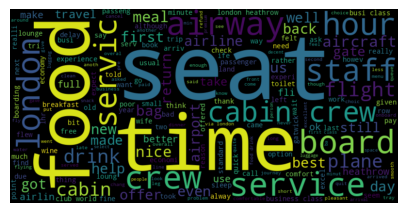

In [ ]:
#Method 2 for data visualization using matplotlib for positive reviews

# Create a WordCloud object
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400).generate(' '.join(Positive_string_list))

# Display the word cloud using matplotlib

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

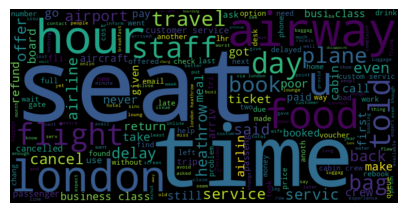

In [ ]:
#Method 2 for data visualization using matplotlib for negative reviews

# Create a WordCloud object
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400).generate(' '.join(Negative_string_list))

# Display the word cloud using matplotlib

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()